# Stereographic Projections

In [1]:
from stereographic_functions import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

First define the lattice vectors- a, b and c for your crystal

In [2]:
latt_a = np.array((2.962,0,0))
latt_b = 2.962* np.array((-0.5,0.866,0))
latt_c = np.array((0,0,15.955))
lattice_vectors = [latt_a, latt_b, latt_c]

Then define a primary hkl of interest

In [11]:
hkl = (4,2,1)

You can view this plane in relation to your lattice using show_hkl()

<IPython.core.display.Javascript object>


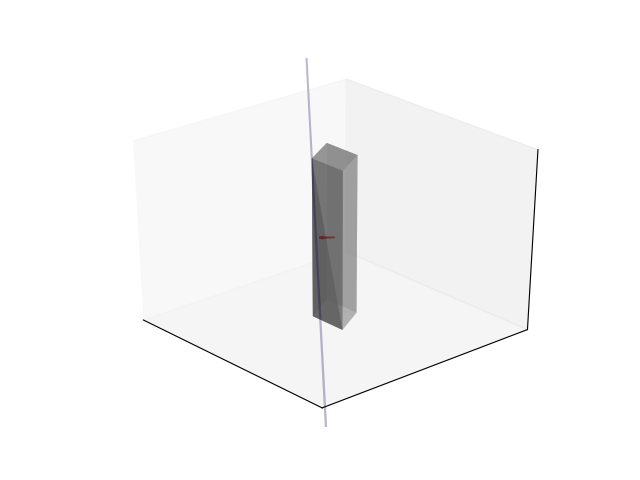

In [12]:
show_hkl(lattice_vectors, hkl, scale =2)

You can then see how this lattice plane is represented in a stereographic projection. The normal to the plane is shown intercepting the surface of a sphere. This point is then projected down onto the equatorial plane following the path to the opposite pole (this maintains angular relationships). The circle created when the plane intercepts the sphere is also projected onto the equatorial plane in a similar manner -- this is called the trace

<IPython.core.display.Javascript object>


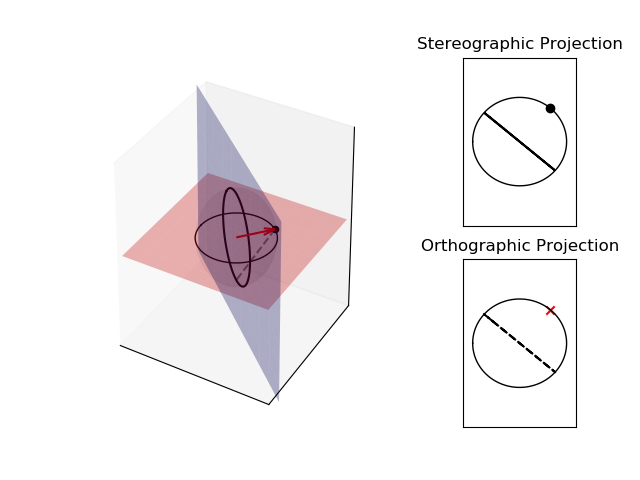

In [5]:
single_vector_display(lattice_vectors, hkl)

You can then create the stereogram for a range of hkl planes by specifing the range of hs, ks and ls you would like to sample

<IPython.core.display.Javascript object>


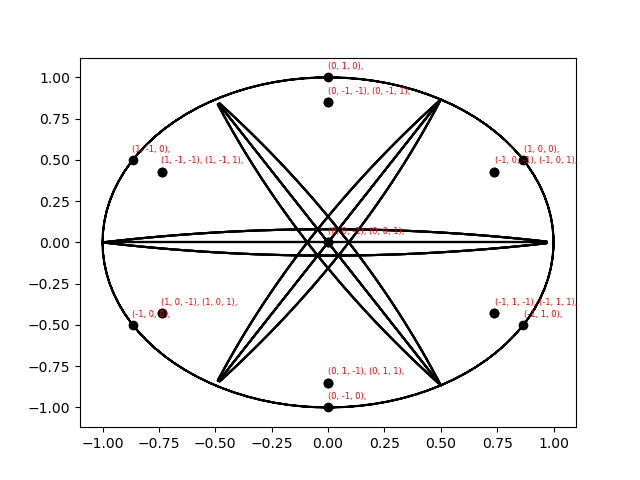

In [18]:
hs = [-1,0,1]
ks = [-1,0,1]
ls = [-1,0,1]
display_stereograph(lattice_vectors, hs, ks, ls, factor = 1e-10, show_trace = True, four_index_notation = False, max_index = 1)

# Some Example Lattice Parameters:
## Cubic
latt_a = np.array((1,0,0))
latt_b = np.array((0,1,0))
latt_c = np.array((0,0,1))
## Rbar3m:
latt_a = np.array((2.962,0,0))
latt_b = 2.962* np.array((-0.5,0.866,0))
latt_c = np.array((0,0,15.955))
## P63/mmc:
latt_a = np.array((2.885,0,0))
latt_b = 2.885* np.array((-0.5,0.866,0))
latt_c = np.array((0,0,11.155))


# Selecting Zone Axes

Now that we have a stereogram plotted we can investigate which planes will fall into a specific region of the stereogram -- **this was a nightmare**. We first specify the three planes which will bind our region. We then work out the shortest path between them and project this down onto the equator to get our region of interest. To establish which planes will lie in this region we need to reverse the projection from both the north and the south pole to get two regions (one on each hemisphere) of interest. These regions are technically spherical triangles (on the surface of the sphere) but we know that the position vectors of the boundaries of these regions (- the shortest paths across the surface) will interesect the plane within which all the vertices sit to form a regular traingle. From here we then must establish whether an arbitary plane-normal will pass through this triangular region.

To do this we find the intercept of the position vector of the arbitary point with the plane in the same hemisphere and calling that point, p. We can then change the basis coordinates to create a 2d problem described by a triangular region with vertices b_1, b_2, b_3 and a point p. It was then a check of whether the point, p, is on the same side of line b_ij as point b_k for all values of k. If it is then it must be within the region.

To visualise this algorithm you can use the within_bound_region method with show = True. This shows the region of interest of the stereogram on the equator in grey with the projections of the boundary planes as black dots. The planar traingular regions which project into the given region are shown in blue and their normals with a blue dotted line. The position vector for a test hkl plane is shown by a red cross and its intercept with the blue plane is shown by a red circle. The projection of the test plane is shown by the grey circle and the projection path is indicated by the grey dotted line



In [7]:
bound_region = ([0,0,1],[1,1,0],[0,-1,0])

<IPython.core.display.Javascript object>


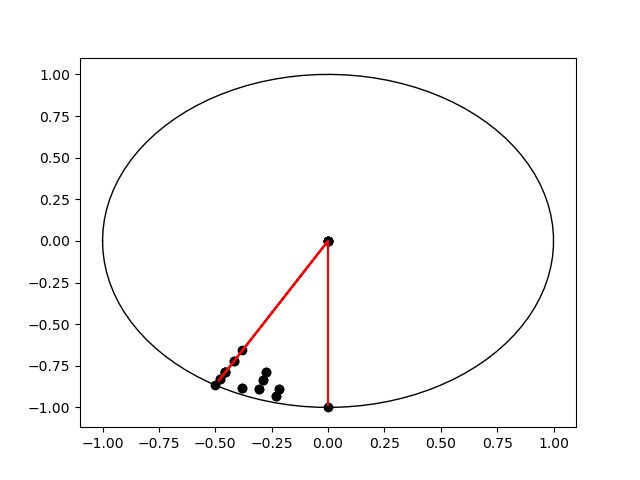

Within Region:  0 0 0 , Threshold Factor:  0.0
Within Region:  0 0 1 , Threshold Factor:  1.0
Within Region:  0 0 2 , Threshold Factor:  2.0
Within Region:  0 0 3 , Threshold Factor:  3.0
Within Region:  1 1 -2 , Threshold Factor:  2.449489742783178
Within Region:  1 1 -1 , Threshold Factor:  1.7320508075688772
Within Region:  1 1 1 , Threshold Factor:  1.7320508075688772
Within Region:  1 1 2 , Threshold Factor:  2.449489742783178
Within Region:  1 1 3 , Threshold Factor:  3.3166247903554
Within Region:  1 2 -3 , Threshold Factor:  3.7416573867739413
Within Region:  1 2 -2 , Threshold Factor:  3.0
Within Region:  1 2 -1 , Threshold Factor:  2.449489742783178
Within Region:  1 2 1 , Threshold Factor:  2.449489742783178
Within Region:  1 2 2 , Threshold Factor:  3.0
Within Region:  1 2 3 , Threshold Factor:  3.7416573867739413
Within Region:  1 3 -2 , Threshold Factor:  3.7416573867739413
Within Region:  1 3 -1 , Threshold Factor:  3.3166247903554
Within Region:  1 3 1 , Threshold Facto

In [17]:
stereograph_sample_region(lattice_vectors, bound_region, ranges = range(-10,10), threshold_hkl = 4)

<IPython.core.display.Javascript object>


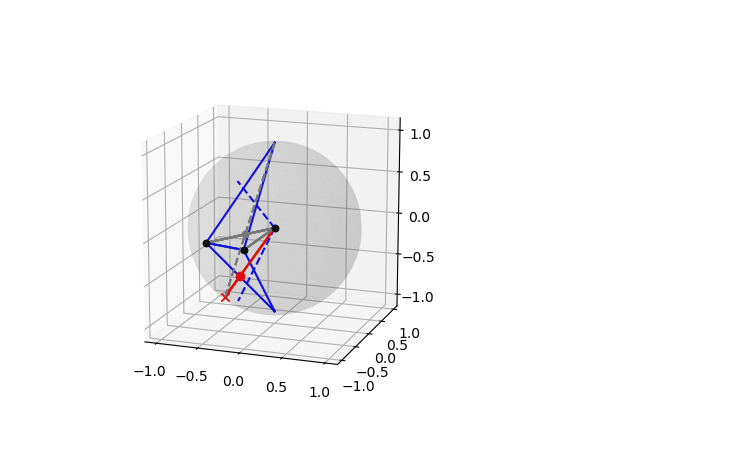

True

In [15]:
position_vector = test_plane([1,1,10], lattice_vectors, factor = 1e-6)
within_bound_region(lattice_vectors,bound_region, position_vector, show = True)